In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import itertools

In [2]:
# load survey data
participant_info_df = pd.read_csv('strategy-identification-prolific-participants.csv')
strategy_id_answers_df = pd.read_csv('strategy-identification-prolific-strategy-id-answers.csv')
mechanism_overall_ratings_df = pd.read_csv('strategy-identification-prolific-mechanism-overall-ratings.csv')

In [3]:
participant_info_df

,user_id,gender,age_group,education,ai_study,pacman_knowledge,time_taken,explanation_mechanism_order,final_thoughts
0,16,Female,18–24,High School,Yes,Have played and understand the game well,610,"('TemporalDecomposition', 'OptimalAction', 'SA...",NaN
1,18,Female,55–64,High School,No,Have played once or twice and have minimal kno...,507,"('TemporalDecomposition', 'DatasetSimilarity',...",NaN
2,20,Female,25–34,High School,No,Have played and understand the game well,680,"('OptimalAction', 'SARFA', 'TemporalDecomposit...",NaN
3,21,Female,35–44,Master's Degree,No,Have played and understand the game well,529,"('SARFA', 'TemporalDecomposition', 'DatasetSim...",NaN
4,22,Male,25–34,Bachelor's Degree,Yes,Have played and understand the game well,648,"('DatasetSimilarity', 'OptimalAction', 'SARFA'...",NaN
...,...,...,...,...,...,...,...,...,...
95,117,Female,25–34,Bachelor's Degree,No,Have played once or twice and have minimal kno...,454,"('SARFA', 'TemporalDecomposition', 'DatasetSim...",NaN
96,118,Male,25–34,Bachelor's Degree,Yes,Have played and understand the game well,1784,"('SARFA', 'TemporalDecomposition', 'OptimalAct...",NaN
97,119,Female,35–44,Bachelor's Degree,No,Have played and understand the game well,1058,"('DatasetSimilarity', 'TemporalDecomposition',...",NaN
98,121,Male,45–54,Bachelor's Degree,No,Have played and understand the game well,791,"('SARFA', 'TemporalDecomposition', 'DatasetSim...",NaN


In [4]:
strategy_id_answers_df

,user_id,obs_id,explanation_mechanism,true_strategy,predicted_strategy,is_correct,confidence,time_taken,survey_question_pos
0,16,15,DatasetSimilarity,EnergyPill,EnergyPill,True,Confident,11.485,14
1,16,8,DatasetSimilarity,Survival,Survival,True,Confident,13.320,12
2,16,16,DatasetSimilarity,Survival,EnergyPill,False,Very Confident,11.731,15
3,16,8,DatasetSimilarity,LoseALife,LoseALife,True,Neutral,22.399,13
4,16,11,TemporalDecomposition,Dots,Survival,False,Neutral,3.927,2
...,...,...,...,...,...,...,...,...,...
1595,122,15,SARFA,LoseALife,LoseALife,True,Very Confident,15.351,0
1596,122,7,OptimalAction,Dots,Dots,True,Confident,16.533,11
1597,122,1,OptimalAction,Survival,Survival,True,Very Confident,16.056,10
1598,122,10,OptimalAction,Survival,LoseALife,False,Confident,14.693,9


In [5]:
mechanism_overall_ratings_df

,user_id,explanation_mechanism,confidence,ease,understanding,additional_thoughts,survey_mechanism_pos
0,16,DatasetSimilarity,Neutral,Somewhat Easy,Neutral,NaN,3
1,16,TemporalDecomposition,Confident,Somewhat Easy,Mostly understood,NaN,0
2,16,SARFA,Unconfident,Somewhat Difficult,Understood very little,NaN,2
3,16,OptimalAction,Neutral,Somewhat Difficult,Neutral,NaN,1
4,18,DatasetSimilarity,Very Unconfident,Very Difficult,Did not understand at all,NaN,1
...,...,...,...,...,...,...,...
395,121,OptimalAction,Neutral,Somewhat Difficult,Mostly understood,NaN,3
396,122,DatasetSimilarity,Confident,Somewhat Easy,Completely understood,NaN,3
397,122,TemporalDecomposition,Confident,Somewhat Easy,Completely understood,NaN,1
398,122,SARFA,Confident,Somewhat Easy,Completely understood,NaN,0


In [6]:
measure_order = [
    ["Very Unconfident", "Unconfident", "Neutral", "Confident", "Very Confident"],
    ["Very Difficult", "Somewhat Difficult", "Neutral", "Somewhat Easy", "Very Easy"],
    ["Did not understand at all", "Understood very little", "Neutral", "Mostly understood", "Completely understood"],
]

In [7]:
mechanism_overall_ratings_df = pd.merge(
    mechanism_overall_ratings_df, strategy_id_answers_df.groupby(["user_id", "explanation_mechanism"])["is_correct"].mean().to_frame("Accuracy"), 
    on=["user_id", "explanation_mechanism"])
mechanism_overall_ratings_df

,user_id,explanation_mechanism,confidence,ease,understanding,additional_thoughts,survey_mechanism_pos,Accuracy
0,16,DatasetSimilarity,Neutral,Somewhat Easy,Neutral,NaN,3,0.75
1,16,TemporalDecomposition,Confident,Somewhat Easy,Mostly understood,NaN,0,0.25
2,16,SARFA,Unconfident,Somewhat Difficult,Understood very little,NaN,2,0.00
3,16,OptimalAction,Neutral,Somewhat Difficult,Neutral,NaN,1,0.50
4,18,DatasetSimilarity,Very Unconfident,Very Difficult,Did not understand at all,NaN,1,0.75
...,...,...,...,...,...,...,...,...
395,121,OptimalAction,Neutral,Somewhat Difficult,Mostly understood,NaN,3,0.00
396,122,DatasetSimilarity,Confident,Somewhat Easy,Completely understood,NaN,3,0.75
397,122,TemporalDecomposition,Confident,Somewhat Easy,Completely understood,NaN,1,0.25
398,122,SARFA,Confident,Somewhat Easy,Completely understood,NaN,0,0.50


# What is each mechanisms overall confidence, ease of identification and understanding? 

In [8]:
mechanism_overall_ratings_df["confidence_rank"] = mechanism_overall_ratings_df["confidence"].map({"Very Unconfident": 1, "Unconfident": 2, "Neutral": 3, "Confident": 4, "Very Confident": 5})
mechanism_overall_ratings_df["ease_rank"] = mechanism_overall_ratings_df["ease"].map({"Very Difficult": 1, "Somewhat Difficult": 2, "Neutral": 3, "Somewhat Easy": 4, "Very Easy": 5})
mechanism_overall_ratings_df["understanding_rank"] = mechanism_overall_ratings_df["understanding"].map({"Did not understand at all": 1, "Understood very little": 2, "Neutral": 3, "Mostly understood": 4, "Completely understood": 5})
mechanism_overall_ratings_df.groupby("explanation_mechanism").agg({"confidence_rank": "mean", "ease_rank": "mean", "understanding_rank": "mean"})

,confidence_rank,ease_rank,understanding_rank
explanation_mechanism,,,
DatasetSimilarity,3.48,3.23,3.56
OptimalAction,3.25,3.06,3.50
SARFA,2.98,2.72,3.23
TemporalDecomposition,2.94,2.61,3.01


In [9]:
df1 = mechanism_overall_ratings_df.groupby(["explanation_mechanism", "confidence"]).agg({"Accuracy": "mean"}).reset_index().pivot(index="explanation_mechanism", columns="confidence", values="Accuracy")
df2 = mechanism_overall_ratings_df.groupby(["explanation_mechanism", "confidence"]).agg({"user_id": "count"}).reset_index().pivot(index="explanation_mechanism", columns="confidence", values="user_id")
df1.combine_first(df2).apply(lambda col: col.combine(df2[col.name], lambda x, y: f'{np.round(x*100, 1)} ({y})')).reindex(['Very Unconfident', 'Unconfident', 'Neutral', 'Confident', 'Very Confident'], axis=1)

confidence,Very Unconfident,Unconfident,Neutral,Confident,Very Confident
explanation_mechanism,,,,,
DatasetSimilarity,68.8 (4),25.0 (7),48.5 (34),59.0 (47),56.2 (8)
OptimalAction,33.3 (3),25.0 (17),24.4 (40),36.7 (32),25.0 (8)
SARFA,6.2 (4),22.6 (31),23.4 (32),21.6 (29),43.8 (4)
TemporalDecomposition,36.4 (11),35.7 (21),32.4 (34),37.1 (31),33.3 (3)


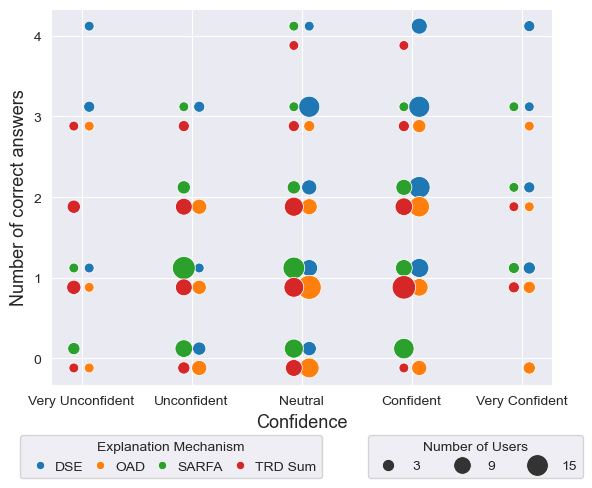

In [10]:
mechanism_overall_ratings_df["confidence_rank"] = mechanism_overall_ratings_df["confidence"].map({"Very Unconfident": 1, "Unconfident": 2, "Neutral": 3, "Confident": 4, "Very Confident": 5})
df = mechanism_overall_ratings_df.groupby(by=["explanation_mechanism", "confidence_rank", "Accuracy"]).size().to_frame("Count").reset_index()
df["Explanation Mechanism"] = df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "OptimalAction": "OAD", "SARFA": "SARFA", "TemporalDecomposition": "TRD Sum"})
df["confidence_rank_perturbed"] = df.apply(lambda row: row["confidence_rank"] + {"DSE": 0.07, "OAD": 0.07, "SARFA": -0.07, "TRD Sum": -.07}[row["Explanation Mechanism"]], axis=1)
df["Accuracy_perturbed"] = df.apply(lambda row: row["Accuracy"] + {"DSE": 0.03, "OAD": -0.03, "SARFA": 0.03, "TRD Sum": -0.03}[row["Explanation Mechanism"]], axis=1)
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.scatterplot(df, x="confidence_rank_perturbed", y="Accuracy_perturbed", hue="Explanation Mechanism", size="Count", sizes=(50, 300), ax=ax)
ax.set_xticks(range(1, 6), ["Very Unconfident", "Unconfident", "Neutral", "Confident", "Very Confident"])
ax.set_xlabel("Confidence", fontsize=13)
ax.set_yticks(np.linspace(0, 1, 5), range(0, 5))
ax.set_ylabel("Number of correct answers", fontsize=13)

handles_hue, labels_hue = ax.get_legend_handles_labels()
hue_legend = plt.legend(handles_hue[1:5], labels_hue[1:5], title='Explanation Mechanism', loc='upper left', bbox_to_anchor=(-0.075, -0.115), ncols=4, columnspacing=0.2, handletextpad=0.1)
size_legend = plt.legend(handles_hue[6::2], labels_hue[6::2], title='Number of Users', loc='upper right', ncols=6, bbox_to_anchor=(1.075, -0.115))
plt.gca().add_artist(hue_legend)
plt.tight_layout()
plt.savefig("figs/explanation_confidence_correct.png")
plt.savefig("figs/explanation_confidence_correct.pdf")

In [11]:
df1 = mechanism_overall_ratings_df.groupby(["explanation_mechanism", "ease"]).agg({"Accuracy": "mean"}).reset_index().pivot(index="explanation_mechanism", columns="ease", values="Accuracy")
df2 = mechanism_overall_ratings_df.groupby(["explanation_mechanism", "ease"]).agg({"user_id": "count"}).reset_index().pivot(index="explanation_mechanism", columns="ease", values="user_id")
df1.combine_first(df2).apply(lambda col: col.combine(df2[col.name], lambda x, y: f'{np.round(x*100, 1)} ({y})')).reindex(['Very Difficult', 'Somewhat Difficult', 'Neutral', 'Somewhat Easy', 'Very Easy'], axis=1)

ease,Very Difficult,Somewhat Difficult,Neutral,Somewhat Easy,Very Easy
explanation_mechanism,,,,,
DatasetSimilarity,62.5 (4),47.9 (24),45.7 (23),59.3 (43),54.2 (6)
OptimalAction,31.2 (4),27.4 (31),30.2 (24),31.1 (37),6.2 (4)
SARFA,16.7 (9),23.7 (38),23.2 (28),20.5 (22),41.7 (3)
TemporalDecomposition,36.1 (18),39.2 (30),32.4 (27),31.5 (23),37.5 (2)


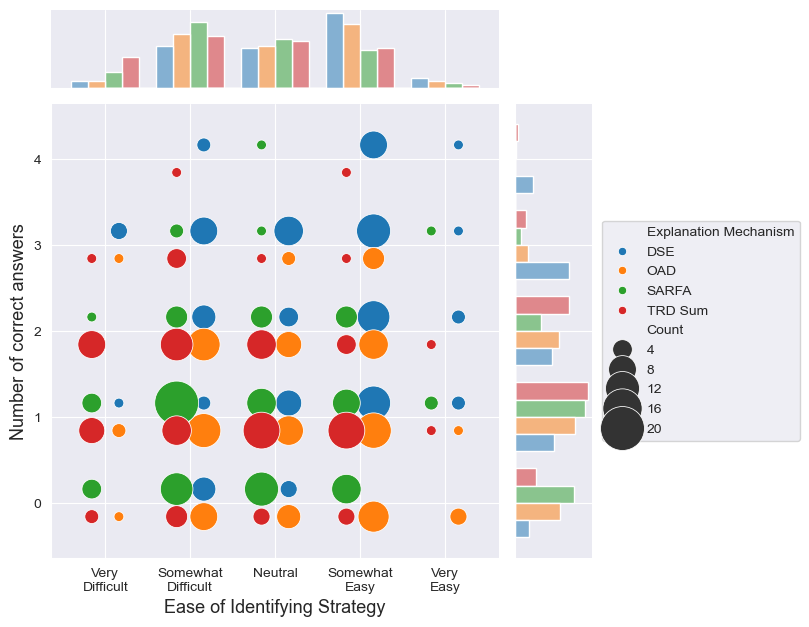

In [12]:
mechanism_overall_ratings_df["ease_rank"] = mechanism_overall_ratings_df["ease"].map({"Very Difficult": 1, "Somewhat Difficult": 2, "Neutral": 3, "Somewhat Easy": 4, "Very Easy": 5})
df = mechanism_overall_ratings_df.groupby(by=["explanation_mechanism", "ease_rank", "Accuracy"]).size().to_frame("Count").reset_index()
df["Explanation Mechanism"] = df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "OptimalAction": "OAD", "SARFA": "SARFA", "TemporalDecomposition": "TRD Sum"})
df["ease_rank_perturbed"] = df.apply(lambda row: row["ease_rank"] * 5 + {"DSE": .8, "OAD": .8, "SARFA": -.8, "TRD Sum": -.8}[row["Explanation Mechanism"]], axis=1)
df["Accuracy_perturbed"] = df.apply(lambda row: row["Accuracy"] * 20 + {"DSE": .8, "OAD": -.8, "SARFA": .8, "TRD Sum": -.8}[row["Explanation Mechanism"]], axis=1)

ax = sns.JointGrid()
sns.scatterplot(df, x="ease_rank_perturbed", y="Accuracy_perturbed", hue="Explanation Mechanism", size="Count", 
                ax=ax.ax_joint, sizes=(50, 1000))
ax.ax_joint.set_xticks(np.linspace(5, 25, 5), ["Very\nDifficult", "Somewhat\nDifficult", "Neutral", "Somewhat\nEasy", "Very\nEasy"])
ax.ax_joint.set_xlabel("Ease of Identifying Strategy", fontsize=13)
ax.ax_joint.set_yticks(np.linspace(0, 20, 5), range(0, 5))
ax.ax_joint.set_ylabel("Number of correct answers", fontsize=13)

ease_df = df.groupby(["Explanation Mechanism", "ease_rank"])["Count"].sum().to_frame("ease_sum").reset_index()
ease_df["ease_rank_pos"] = ease_df.apply(lambda row: row["ease_rank"] * 5 + {"DSE": -1.5, "OAD": -.5, "SARFA": .5, "TRD Sum": 1.5}[row["Explanation Mechanism"]], axis=1) 
sns.histplot(ease_df, x="ease_rank_pos", weights="ease_sum", hue="Explanation Mechanism", hue_order=["DSE", "OAD", "SARFA", "TRD Sum"], ax=ax.ax_marg_x,  discrete=True, legend=False)

accuracy_df = df.groupby(["Explanation Mechanism", "Accuracy"])["Count"].sum().to_frame("Accuracy_sum").reset_index()
accuracy_df["Accuracy_sum_pos"] = accuracy_df.apply(lambda row: row["Accuracy"] * 20 + {"DSE": -1.5, "OAD": -.5, "SARFA": .5, "TRD Sum": 1.5}[row["Explanation Mechanism"]], axis=1) 
sns.histplot(accuracy_df, y="Accuracy_sum_pos", weights="Accuracy_sum", hue="Explanation Mechanism", hue_order=["DSE", "OAD", "SARFA", "TRD Sum"], ax=ax.ax_marg_y, discrete=True, legend=False,)
 
sns.move_legend(ax.ax_joint, loc="center", bbox_to_anchor=(1.45, .5))
# plt.tight_layout()
plt.savefig("figs/explanation_ease_correct.png")
plt.savefig("figs/explanation_ease_correct.pdf")

In [13]:
df1 = mechanism_overall_ratings_df.groupby(["explanation_mechanism", "understanding"]).agg({"Accuracy": "mean"}).reset_index().pivot(index="explanation_mechanism", columns="understanding", values="Accuracy")
df2 = mechanism_overall_ratings_df.groupby(["explanation_mechanism", "understanding"]).agg({"user_id": "count"}).reset_index().pivot(index="explanation_mechanism", columns="understanding", values="user_id")
df1.combine_first(df2).apply(lambda col: col.combine(df2[col.name], lambda x, y: f'{np.round(x*100, 1)} ({y})')).reindex(['Did not understand at all', 'Understood very little', 'Neutral', 'Mostly understood', 'Completely understood'], axis=1)

understanding,Did not understand at all,Understood very little,Neutral,Mostly understood,Completely understood
explanation_mechanism,,,,,
DatasetSimilarity,62.5 (4),46.4 (7),50.0 (30),56.9 (47),47.9 (12)
OptimalAction,0.0 (1),31.2 (16),26.0 (24),29.0 (50),33.3 (9)
SARFA,8.3 (3),19.2 (26),26.0 (25),23.6 (37),25.0 (9)
TemporalDecomposition,42.3 (13),42.1 (19),31.2 (28),30.9 (34),37.5 (6)


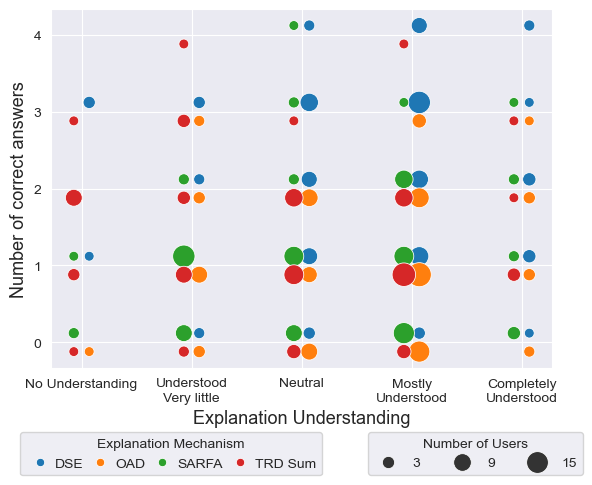

In [14]:
mechanism_overall_ratings_df["understanding_rank"] = mechanism_overall_ratings_df["understanding"].map({"Did not understand at all": 1, "Understood very little": 2, "Neutral": 3, "Mostly understood": 4, "Completely understood": 5})
df = mechanism_overall_ratings_df.groupby(by=["explanation_mechanism", "understanding_rank", "Accuracy"]).size().to_frame("Count").reset_index()
df["Explanation Mechanism"] = df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "OptimalAction": "OAD", "SARFA": "SARFA", "TemporalDecomposition": "TRD Sum"})
df["understanding_rank_perturbed"] = df.apply(lambda row: row["understanding_rank"] + {"DSE": 0.07, "OAD": 0.07, "SARFA": -0.07, "TRD Sum": -.07}[row["Explanation Mechanism"]], axis=1)
df["Accuracy_perturbed"] = df.apply(lambda row: row["Accuracy"] + {"DSE": 0.03, "OAD": -0.03, "SARFA": 0.03, "TRD Sum": -0.03}[row["Explanation Mechanism"]], axis=1)
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.scatterplot(df, x="understanding_rank_perturbed", y="Accuracy_perturbed", hue="Explanation Mechanism", size="Count", sizes=(50, 300), ax=ax)
ax.set_xticks(range(1, 6), ["No Understanding", "Understood\nVery little", "Neutral", "Mostly\nUnderstood", "Completely\nUnderstood"])
ax.set_xlabel("Explanation Understanding", fontsize=13)
ax.set_yticks(np.linspace(0, 1, 5), range(0, 5))
ax.set_ylabel("Number of correct answers", fontsize=13)

handles_hue, labels_hue = ax.get_legend_handles_labels()
hue_legend = plt.legend(handles_hue[1:5], labels_hue[1:5], title='Explanation Mechanism', loc='upper left', bbox_to_anchor=(-0.075, -0.16), ncols=4, columnspacing=0.2, handletextpad=0.1)
plt.legend(handles_hue[6::2], labels_hue[6::2], title='Number of Users', loc='upper right', ncols=6, bbox_to_anchor=(1.075, -0.16))
plt.gca().add_artist(hue_legend)
plt.tight_layout()
plt.savefig("figs/explanation_understanding_correct.png")
plt.savefig("figs/explanation_understanding_correct.pdf")

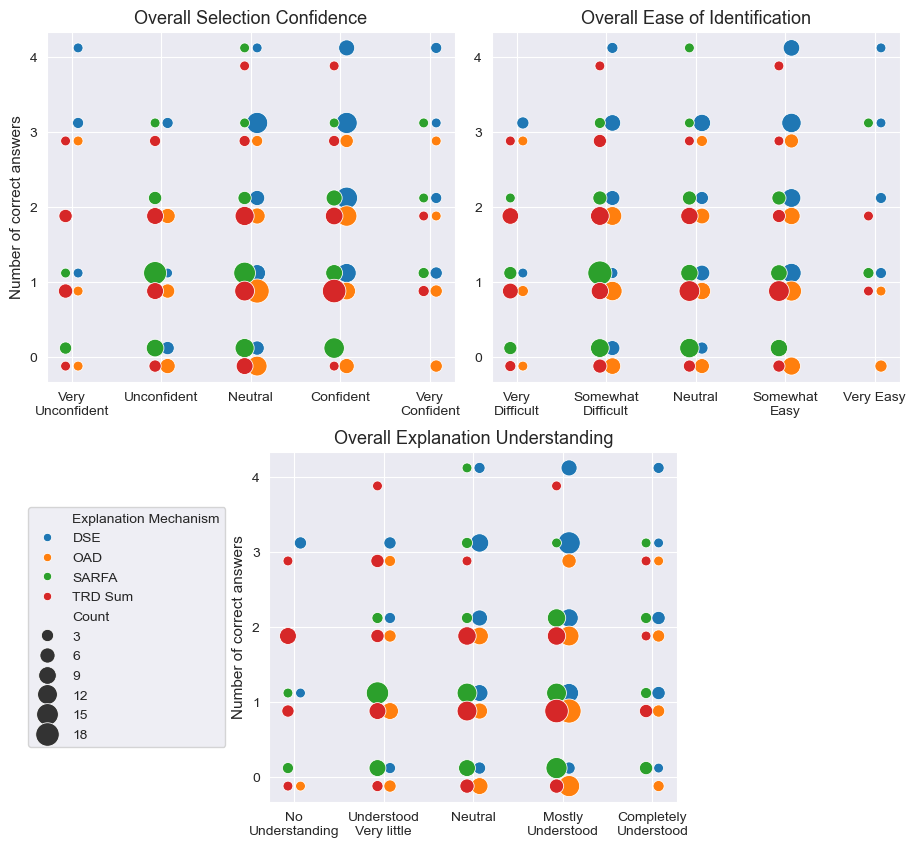

In [15]:
def centered_subplots(rows, figsize):
    grid_dim = max(rows)
    grid_shape = (len(rows), 2 * grid_dim)

    centred_fig = plt.figure(figsize=figsize)
    centred_axs = []
    for j, row in enumerate(rows):
        offset = 0
        for i in range(row):
            if row < grid_dim:
                offset = grid_dim - row

            centred_axs.append(plt.subplot2grid(grid_shape, (j, 2 * i + offset), fig=centred_fig, colspan=2))

    return centred_axs

axs = centered_subplots([2, 1], (11, 10))
for ax, measure, measure_title, ranks in zip(
        axs, ["confidence", "ease", "understanding"], ["Overall Selection Confidence", "Overall Ease of Identification", "Overall Explanation Understanding"], 
        [["Very\nUnconfident", "Unconfident", "Neutral", "Confident", "Very\nConfident"], 
         ["Very\nDifficult", "Somewhat\nDifficult", "Neutral", "Somewhat\nEasy", "Very Easy"], 
         ["No\nUnderstanding", "Understood\nVery little", "Neutral", "Mostly\nUnderstood", "Completely\nUnderstood"]]):
    df = mechanism_overall_ratings_df.groupby(by=["explanation_mechanism", f"{measure}_rank", "Accuracy"]).size().to_frame("Count").reset_index()
    df["Explanation Mechanism"] = df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "OptimalAction": "OAD", "SARFA": "SARFA", "TemporalDecomposition": "TRD Sum"})
    df["rank_perturbed"] = df.apply(lambda row: row[f"{measure}_rank"] + {"DSE": 0.07, "OAD": 0.07, "SARFA": -0.07, "TRD Sum": -.07}[row["Explanation Mechanism"]], axis=1)
    df["Accuracy_perturbed"] = df.apply(lambda row: row["Accuracy"] + {"DSE": 0.03, "OAD": -0.03, "SARFA": 0.03, "TRD Sum": -0.03}[row["Explanation Mechanism"]], axis=1)
    ax = sns.scatterplot(df, x="rank_perturbed", y="Accuracy_perturbed", hue="Explanation Mechanism", size="Count", sizes=(50, 300), ax=ax)
    ax.set_title(measure_title, fontsize=13)
    ax.set_xticks(range(1, 6), ranks)
    ax.set_xlabel("")
    ax.set_yticks(np.linspace(0, 1, 5), range(0, 5))
    ax.set_ylabel("Number of correct answers", fontsize=11)
    
    # handles_hue, labels_hue = ax.get_legend_handles_labels()
    # print(f'{measure=}, min_point={labels_hue[6]}, max_point={labels_hue[-1]}')
axs[0].legend().remove()
axs[1].legend().remove()
axs[1].set_ylabel("")
sns.move_legend(axs[2], loc="center", bbox_to_anchor=(-.35, .5))
plt.savefig("figs/mechanism-overall-measure-accuracy.png", bbox_inches='tight')
plt.savefig("figs/mechanism-overall-measure-accuracy.pdf", bbox_inches='tight')

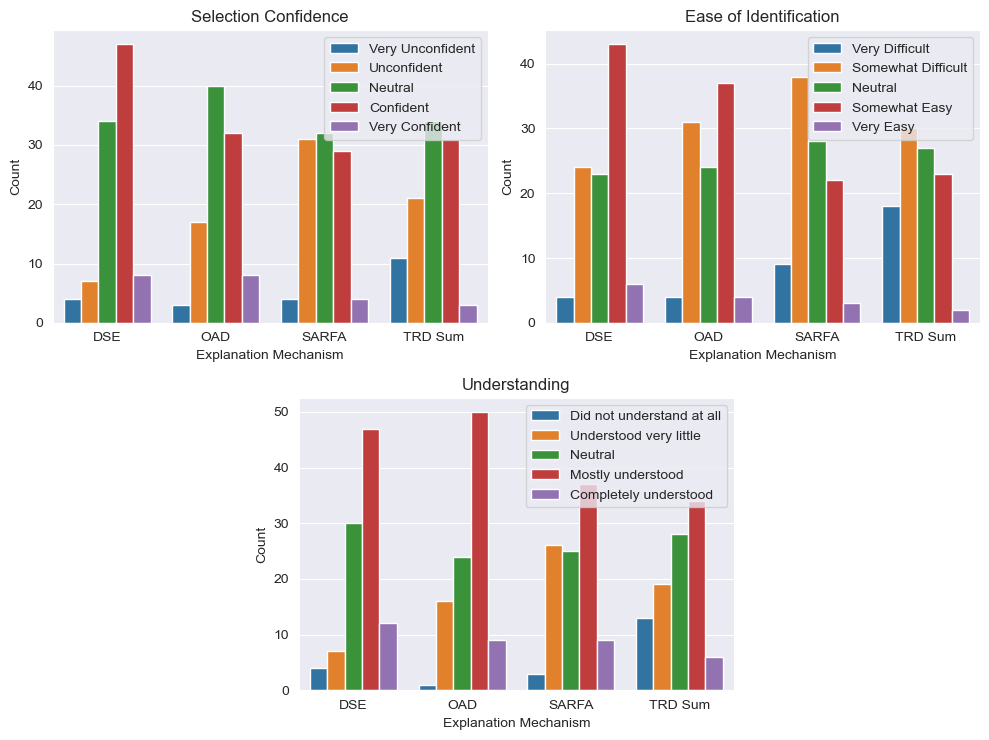

In [16]:
axs = centered_subplots([2, 1], figsize=(10, 7.5))
mechanism_overall_ratings_df["Explanation Mechanism"] = mechanism_overall_ratings_df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "OptimalAction": "OAD", "SARFA": "SARFA", "TemporalDecomposition": "TRD Sum"})

for ax, measure, order, title in zip(axs, ["confidence", "ease", "understanding"], measure_order, ["Selection Confidence", "Ease of Identification", "Understanding"]):
    sns.barplot(data=mechanism_overall_ratings_df.groupby(by=["Explanation Mechanism", measure]).size().to_frame("Count").reset_index(), x="Explanation Mechanism", y="Count", hue=measure, hue_order=order, ax=ax)
    ax.set_title(title)
    ax.legend(title="")
plt.tight_layout()
plt.savefig('figs/mechanism-overall-ratings.png')
plt.savefig('figs/mechanism-overall-ratings.pdf')

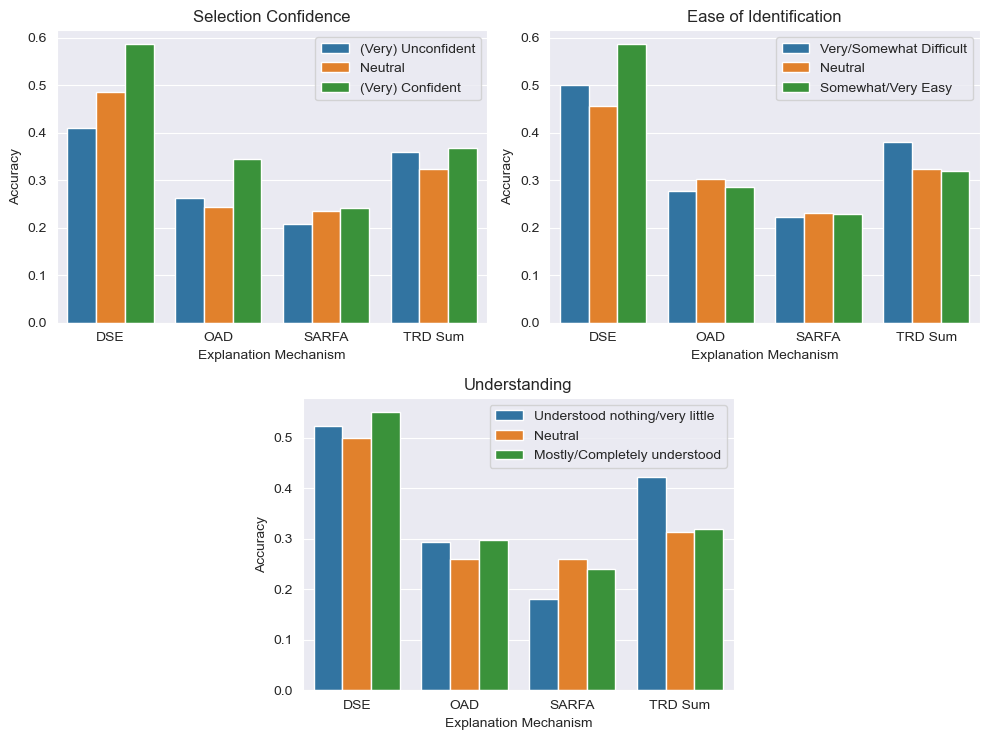

In [17]:
mechanism_overall_ratings_df["Explanation Mechanism"] = mechanism_overall_ratings_df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "OptimalAction": "OAD", "SARFA": "SARFA", "TemporalDecomposition": "TRD Sum"})

mechanism_overall_ratings_df["Joint Confidence"] = mechanism_overall_ratings_df["confidence"].map({"Very Unconfident": "(Very) Unconfident", "Unconfident": "(Very) Unconfident", "Neutral": "Neutral", "Confident": "(Very) Confident", "Very Confident": "(Very) Confident"})
mechanism_overall_ratings_df["Joint Ease"] = mechanism_overall_ratings_df["ease"].map({"Very Difficult": "Very/Somewhat Difficult", "Somewhat Difficult": "Very/Somewhat Difficult", "Neutral": "Neutral", "Somewhat Easy": "Somewhat/Very Easy", "Very Easy": "Somewhat/Very Easy"})
mechanism_overall_ratings_df["Joint Understanding"] = mechanism_overall_ratings_df["understanding"].map({"Did not understand at all": "Understood nothing/very little", "Understood very little": "Understood nothing/very little", "Neutral": "Neutral", "Mostly understood": "Mostly/Completely understood", "Completely understood": "Mostly/Completely understood"})

joint_measure_order = [
    ["(Very) Unconfident", "Neutral", "(Very) Confident"],
    ["Very/Somewhat Difficult", "Neutral", "Somewhat/Very Easy"],
    ["Understood nothing/very little", "Neutral", "Mostly/Completely understood"],
]

axs = centered_subplots([2, 1], figsize=(10, 7.5))
for ax, measure, order, title in zip(axs, ["Joint Confidence", "Joint Ease", "Joint Understanding"], joint_measure_order, ["Selection Confidence", "Ease of Identification", "Understanding"]):
    sns.barplot(data=mechanism_overall_ratings_df.groupby(by=["Explanation Mechanism", measure])["Accuracy"].mean().to_frame("Accuracy").reset_index(),
                x="Explanation Mechanism", y="Accuracy", hue=measure, hue_order=order, ax=ax)
    ax.set_title(title)
    ax.legend(title="")
plt.tight_layout()
plt.savefig('figs/mechanism-overall-ratings-accuracy.png')

DSE
OAD
SARFA
TRD Sum
DSE
OAD
SARFA
TRD Sum
DSE
OAD
SARFA
TRD Sum


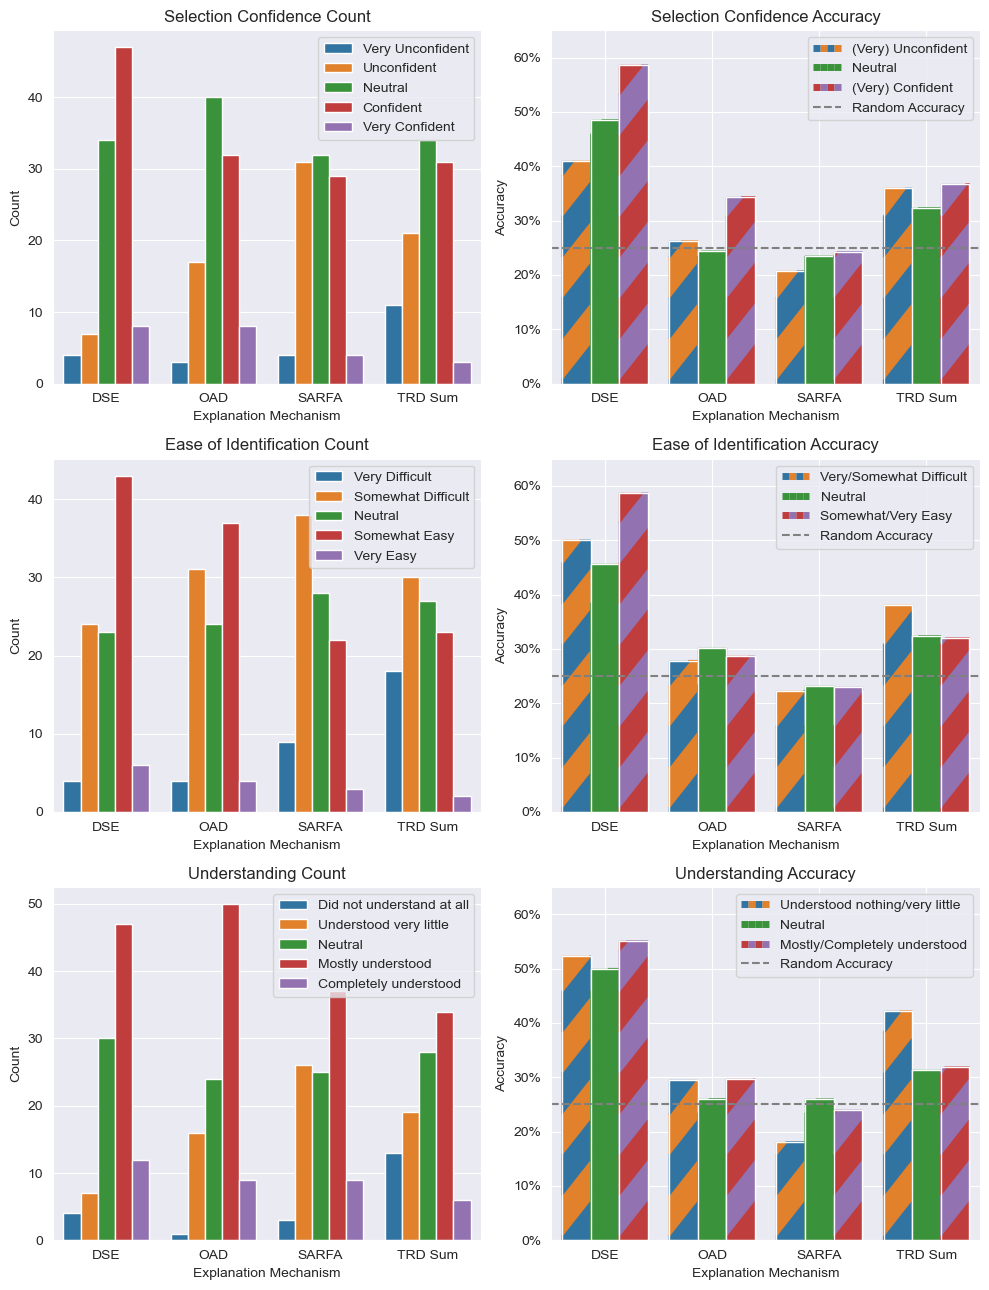

In [18]:
def barplot_striped(ax, x: float, bar_height: float, colours: list[str], bar_width: float = 1.0,
                     stripe_width: float = 0.2, gradient: float = 1.0):
    ax.add_patch(patches.Rectangle((x, 0), bar_width, bar_height, edgecolor="white"))
    for y, colour in zip(np.arange(-gradient * bar_width, bar_height, stripe_width), itertools.cycle(colours)):
        y_prime = y + gradient * bar_width
        if y_prime + stripe_width <= bar_height:
            ax.add_patch(patches.Polygon([
                (x, y),
                (x, y + stripe_width),
                (x + bar_width, y_prime + stripe_width),
                (x + bar_width, y_prime),
            ], closed=True, color=colour))
        elif y_prime <= bar_height:
            ax.add_patch(patches.Polygon([
                (x, y),
                (x, min(y + stripe_width, bar_height)),
                (x + max(bar_height - (y + stripe_width), 0) / gradient, bar_height),
                (x + bar_width, bar_height),
                (x + bar_width, y_prime),
            ], closed=True, color=colour))
        else:
            ax.add_patch(patches.Polygon([
                (x, y),
                (x, min(y + stripe_width, bar_height)),
                (x + max(bar_height - (y + stripe_width), 0) / gradient, bar_height),
                (x + (bar_height - y) / gradient, bar_height),
            ], closed=True, color=colour))
    edge = patches.Polygon([(x, 0), (x + bar_width, 0), (x + bar_width, bar_height), (x, bar_height)], fc=(0,0,0,0), ec=(1,1,1,1), linewidth=1)
    ax.add_patch(edge)

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 13))
for ax, measure, order, title in zip(axs[:, 0], ["confidence", "ease", "understanding"], measure_order, ["Selection Confidence", "Ease of Identification", "Understanding"]):
    sns.barplot(data=mechanism_overall_ratings_df.groupby(by=["Explanation Mechanism", measure]).size().to_frame("Count").reset_index(), x="Explanation Mechanism", y="Count", hue=measure, hue_order=order, ax=ax)
    ax.set_title(f"{title} Count")
    ax.legend(title="")
    
all_colours = [axs[0][0].containers[i][0]._facecolor for i in range(5)]
joint_colours = [(all_colours[0], all_colours[1]), (all_colours[2],), (all_colours[3], all_colours[4])]
for ax, measure, order, title in zip(axs[:, 1], ["Joint Confidence", "Joint Ease", "Joint Understanding"], joint_measure_order, ["Selection Confidence", "Ease of Identification", "Understanding"]):
    # sns.barplot(data=mechanism_overall_ratings_df.groupby(by=["Explanation Mechanism", measure])["Accuracy"].mean().to_frame("Accuracy").reset_index(), x="Explanation Mechanism", y="Accuracy", hue=measure, hue_order=order, ax=ax)
    for i, (mechanism, df) in enumerate(mechanism_overall_ratings_df.groupby(by="Explanation Mechanism")):
        print(mechanism)
        measure_df = (df.groupby(measure)["Accuracy"].mean().to_frame("Accuracy").reset_index()
                      .sort_values(by=measure, key=lambda x: x.map(dict(zip(order, range(1, 4))))))        
        for j, (accuracy, colours) in enumerate(zip(measure_df["Accuracy"], joint_colours)):
            barplot_striped(ax, i + j * (.8/3), accuracy, colours, bar_width=.8/3, gradient=.25, stripe_width=.075)

    ax.set_xlim(-.1, 3.9)
    ax.set_xticks([.4, 1.4, 2.4, 3.4], ["DSE", "OAD", "SARFA", "TRD Sum"])
    ax.set_xlabel("Explanation Mechanism")
    ax.set_ylim(0, .65)
    ax.set_yticks(np.linspace(0, 0.6, 7), [f"{x}%" for x in np.linspace(0, 60, 7, dtype=int)])
    ax.set_ylabel("Accuracy")
    ax.axhline(0.25, linestyle="--", color="gray")
    ax.set_title(f'{title} Accuracy')
    ax.legend([Line2D([], [], color=all_colours[0], gapcolor=all_colours[1], dashes=[1, 1], linewidth=5), 
               Line2D([], [], color=all_colours[2], gapcolor=all_colours[2], dashes=[1, 1], linewidth=5), 
               Line2D([], [], color=all_colours[3], gapcolor=all_colours[4], dashes=[1, 1], linewidth=5),
               Line2D([], [], color="gray", linestyle='--')],
              order + ["Random Accuracy"], title="")

plt.tight_layout()
plt.savefig('figs/mechanism-overall-ratings-with-accuracy.png')
plt.savefig('figs/mechanism-overall-ratings-with-accuracy.pdf')

# Is there a difference between the explanation's average question confidence and its overall confidence? 

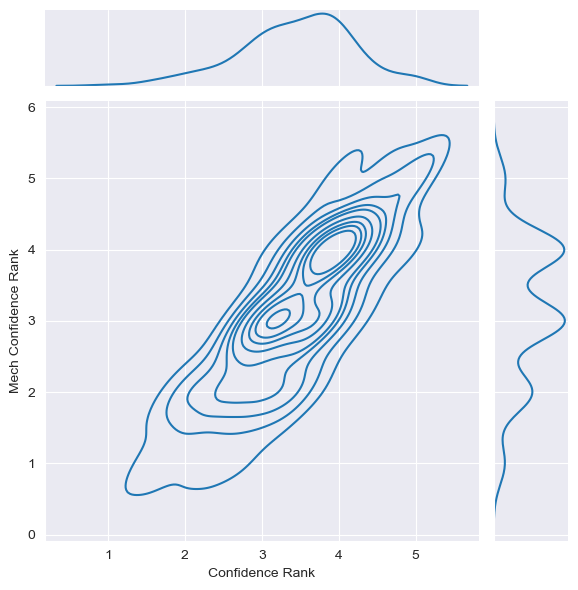

In [19]:
strategy_id_answers_df["Confidence Rank"] = strategy_id_answers_df["confidence"].map({"Very Unconfident": 1, "Unconfident": 2, "Neutral": 3, "Confident": 4, "Very Confident": 5})
mechanism_overall_ratings_df["Mech Confidence Rank"] = mechanism_overall_ratings_df["confidence"].map({"Very Unconfident": 1, "Unconfident": 2, "Neutral": 3, "Confident": 4, "Very Confident": 5})
sns.jointplot(pd.merge(strategy_id_answers_df.groupby(["user_id", "explanation_mechanism"])["Confidence Rank"].mean().to_frame("Confidence Rank"), mechanism_overall_ratings_df, on=["user_id", "explanation_mechanism"], how="left"), 
            x="Confidence Rank", y="Mech Confidence Rank", kind="kde")

Text(0, 0.5, '')

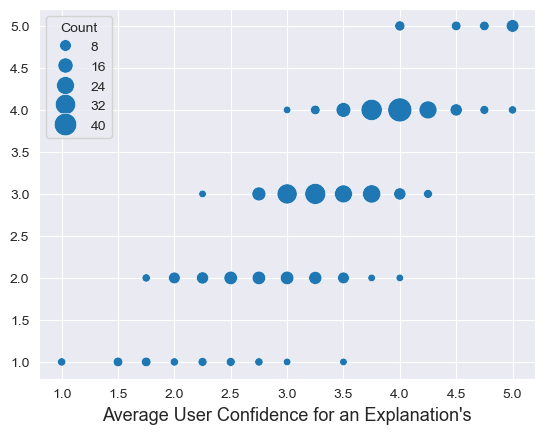

In [20]:
strategy_id_answers_df["Confidence Rank"] = strategy_id_answers_df["confidence"].map({"Very Unconfident": 1, "Unconfident": 2, "Neutral": 3, "Confident": 4, "Very Confident": 5})
mechanism_overall_ratings_df["Mech Confidence Rank"] = mechanism_overall_ratings_df["confidence"].map({"Very Unconfident": 1, "Unconfident": 2, "Neutral": 3, "Confident": 4, "Very Confident": 5})

df = pd.merge(strategy_id_answers_df.groupby(["user_id", "explanation_mechanism"])["Confidence Rank"].mean().to_frame("Confidence Rank"), 
              mechanism_overall_ratings_df, on=["user_id", "explanation_mechanism"], how="left")
ax = sns.scatterplot(df.groupby(["Confidence Rank", "Mech Confidence Rank"]).size().to_frame("Count"), x="Confidence Rank", y="Mech Confidence Rank", size="Count", sizes=(30, 300))
ax.set_xlabel("Average User Confidence for an Explanation's", fontsize=13)
ax.set_ylabel("")

In [21]:
pd.merge(strategy_id_answers_df.groupby(["user_id", "explanation_mechanism"])["Confidence Rank"].mean().to_frame("Confidence Rank"), mechanism_overall_ratings_df, on=["user_id", "explanation_mechanism"], how="left").groupby(["Confidence Rank", "Mech Confidence Rank"]).size().to_frame("Count")

Count
Confidence Rank Mech Confidence Rank       
1.00            1                         2
1.50            1                         4
1.75            1                         4
                2                         2
2.00            1                         2
                2                         8
2.25            1                         3
                2                         9
                3                         1
2.50            1                         3
                2                        12
2.75            1                         2
                2                        12
                3                        13
3.00            1                         1
                2                        12
                3                        31
                4                         1
3.25            2                        11
                3                        34
                4                         4
3.50            1                         1
                2                         8
                3                        24
                4                        15
3.75            2                         1
                3                        25
                4                        35
4.00            2                         1
                3                         9
                4                        46
                5                         5
4.25            3                         3
                4                        24
4.50            4                         9
                5                         4
4.75            4                         3
                5                         4
5.00            4                         2
                5                        10

# Is there a relationship between the question confidence and accuracy? What is the per explanation mechanism relationship?

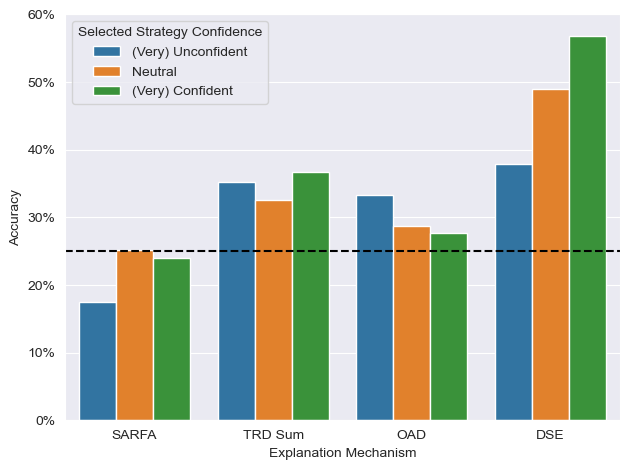

In [28]:
strategy_id_answers_df["Explanation Mechanism"] = strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "TemporalDecomposition": "TRD Sum", "SARFA": "SARFA", "OptimalAction": "OAD"})
strategy_id_answers_df["Joint Confident"] = strategy_id_answers_df["confidence"].map({"Very Unconfident": "(Very) Unconfident", "Unconfident": "(Very) Unconfident", "Neutral": "Neutral", "Confident": "(Very) Confident", "Very Confident": "(Very) Confident"})
ax = sns.barplot(strategy_id_answers_df.sort_values(by="confidence", key=lambda x: x.map(dict(zip(measure_order[0], range(5))))), hue="Joint Confident", y="is_correct", x="Explanation Mechanism", errorbar=None)
plt.legend(title="Selected Strategy Confidence")
ax.axhline(0.25, linestyle='--', color="black", label="Random")
ax.set_ylabel("Accuracy")
ax.set_yticks(np.linspace(0, 0.6, 7), [f'{int(x)}%' for x in np.linspace(0, 60, 7)])
plt.tight_layout()
plt.savefig('figs/confidence-mechanism-accuracy.png')
plt.savefig('figs/confidence-mechanism-accuracy.pdf')

In [30]:
df1 = strategy_id_answers_df.groupby(["explanation_mechanism", "Joint Confident"]).agg({"is_correct": "mean"}).reset_index().pivot(index="explanation_mechanism", columns="Joint Confident", values="is_correct")
df2 = strategy_id_answers_df.groupby(["explanation_mechanism", "Joint Confident"]).agg({"user_id": "count"}).reset_index().pivot(index="explanation_mechanism", columns="Joint Confident", values="user_id")
df1.combine_first(df2).apply(
    lambda col: col.combine(df2[col.name], lambda x, y: [np.round(x*100, 1), y])
).reindex(['(Very) Unconfident', 'Neutral', '(Very) Confident'], axis=1)

Joint Confident,(Very) Unconfident,Neutral,(Very) Confident
explanation_mechanism,,,
DatasetSimilarity,"[37.8, 37]","[48.9, 92]","[56.8, 271]"
OptimalAction,"[33.3, 51]","[28.7, 129]","[27.7, 220]"
SARFA,"[17.5, 97]","[25.2, 115]","[23.9, 188]"
TemporalDecomposition,"[35.2, 88]","[32.6, 132]","[36.7, 180]"


In [24]:
df1 = strategy_id_answers_df.groupby(["explanation_mechanism", "confidence"]).agg({"is_correct": "mean"}).reset_index().pivot(index="explanation_mechanism", columns="confidence", values="is_correct")
df2 = strategy_id_answers_df.groupby(["explanation_mechanism", "confidence"]).agg({"user_id": "count"}).reset_index().pivot(index="explanation_mechanism", columns="confidence", values="user_id")
df1.combine_first(df2).apply(
    lambda col: col.combine(df2[col.name], lambda x, y: f'{np.round(x*100, 1)} ({y})')
).reindex(['Very Unconfident', 'Unconfident', 'Neutral', 'Confident', 'Very Confident'], axis=1)

confidence,Very Unconfident,Unconfident,Neutral,Confident,Very Confident
explanation_mechanism,,,,,
DatasetSimilarity,80.0 (5),31.2 (32),48.9 (92),55.9 (213),60.3 (58)
OptimalAction,55.6 (9),28.6 (42),28.7 (129),29.7 (172),20.8 (48)
SARFA,21.4 (14),16.9 (83),25.2 (115),23.8 (143),24.4 (45)
TemporalDecomposition,56.2 (16),30.6 (72),32.6 (132),36.9 (149),35.5 (31)


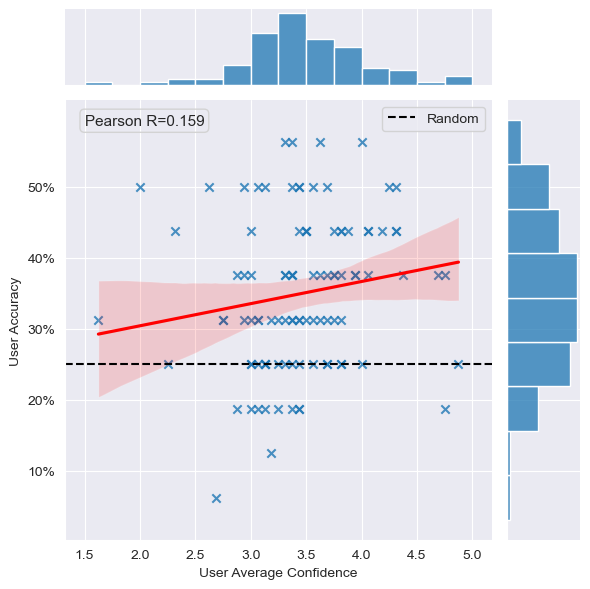

In [25]:
strategy_id_answers_df["Confident Rank"] = strategy_id_answers_df["confidence"].map({"Very Unconfident": 1, "Unconfident": 2, "Neutral": 3, "Confident": 4, "Very Confident": 5})
ax = sns.JointGrid()
sns.regplot(strategy_id_answers_df.groupby("user_id").agg({"is_correct": "mean", "Confident Rank": "mean"}), y="is_correct", x="Confident Rank", line_kws=dict(color="r"), marker="x", ax=ax.ax_joint)
sns.histplot(strategy_id_answers_df.groupby("user_id").agg({"is_correct": "mean", "Confident Rank": "mean"}), x="Confident Rank", bins=np.linspace(1.5, 5, 15), ax=ax.ax_marg_x)
sns.histplot(strategy_id_answers_df.groupby("user_id").agg({"is_correct": "mean", "Confident Rank": "mean"}), y="is_correct", bins=np.linspace(0, 0.5625, 10) + 1/32, ax=ax.ax_marg_y)
ax.ax_joint.set_yticks(np.linspace(0.1, 0.5, 5), [f'{int(x)}%' for x in np.linspace(10, 50, 5)])
ax.ax_joint.set_ylabel("User Accuracy")
ax.ax_joint.set_xlabel("User Average Confidence")
ax.ax_joint.axhline(0.25, linestyle='--', color="black", label="Random")
ax.ax_joint.legend()
df = strategy_id_answers_df.groupby("user_id").agg({"is_correct": "mean", "Confident Rank": "mean"})
ax.ax_joint.text(1.5, .587, f'Pearson R={stats.pearsonr(df["is_correct"], df["Confident Rank"]).statistic:4.3f}', fontdict={"fontsize": 11}, bbox=dict(boxstyle='round', fill=None, edgecolor='lightgrey'))
plt.tight_layout()
plt.savefig("figs/user-confidence-accuracy.png")
plt.savefig("figs/user-confidence-accuracy.pdf")

# Are there any optional additional thoughts provided by users? 

In [26]:
for mechanism, thoughts in mechanism_overall_ratings_df[mechanism_overall_ratings_df["additional_thoughts"].notna()].groupby(["explanation_mechanism"])["additional_thoughts"].apply(list).to_frame("additional_thoughts").iterrows():
    print(mechanism)
    for thought in thoughts["additional_thoughts"]:
        print(f'\t{thought}')

DatasetSimilarity
	I think it's a small screen and difficult to see
	none
	No ADDITIONAL THOUHTS, THIS IS GREAT OVERALL,
	Sometimes it seemed like two different agent's strategies could be in play, so I felt like I needed to watch it a few times, as they could arguably overlap.
	Im confused a little 
	This was easier than the pictures, and easier than the word explanations.
	task was written in a confusing way
	Some videos I thought I understood, others I didn't understand the intention.
	The videos weren't long enough to accurately judge the strategy.
	It was sometimes difficult to understand if the agent was trying to avoid the ghosts but was just a little bit rubbish.  Did it intend to get eaten or did it just make a mistake?  
	none 
	Some of my first impressions seem to depend on the direction that the agent is facing
OptimalAction
	action described wasnt possible
	This was tricky when it suggested directions that would block the agent in, as it pigeon holes you into thinking it w

In [27]:
participant_info_df[participant_info_df["final_thoughts"].notna()]["final_thoughts"]

12                                                 none
16                                         No thank you
29                                           gibberish 
31    It was difficult to interpret the game footage...
34                               Its very tricky for me
42                              I feel dumb after that 
57                                                   No
59    difficult to understand the task based on how ...
71                   interesting. love the game. thanks
74    It was difficult to be confident without feedback
85    A very enjoyable survey.  As I wrote in a prev...
86    Not sure if the Heatmap on the final section w...
87                              this was very different
89                                                 none
90    It was a really interesting survey and I'd hav...
Name: final_thoughts, dtype: object